<a href="https://colab.research.google.com/github/Jev-liv/Katarak_Project/blob/main/DL_UTS_KATARAK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
pip install --upgrade kagglehub


In [ ]:
#import dataset dengan api keys

import kagglehub

# Download latest version
path = kagglehub.dataset_download("nandanp6/cataract-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cataract-image-dataset


In [ ]:
import os
import kagglehub

# Cek isi folder
for root, dirs, files in os.walk(path):
    print("📁", root)
    for d in dirs:
        print("   └── 📂", d)
    for f in files:
        print("   └── 📄", f)


📁 /kaggle/input/cataract-image-dataset
   └── 📂 processed_images
📁 /kaggle/input/cataract-image-dataset/processed_images
   └── 📂 test
   └── 📂 train
📁 /kaggle/input/cataract-image-dataset/processed_images/test
   └── 📂 normal
   └── 📂 cataract
📁 /kaggle/input/cataract-image-dataset/processed_images/test/normal
   └── 📄 image_281.png
   └── 📄 image_256.png
   └── 📄 image_301.png
   └── 📄 image_253.png
   └── 📄 image_265.png
   └── 📄 image_286.png
   └── 📄 image_248.png
   └── 📄 image_287.png
   └── 📄 image_264.png
   └── 📄 image_288.png
   └── 📄 image_282.png
   └── 📄 image_278.png
   └── 📄 image_251.png
   └── 📄 image_292.png
   └── 📄 image_269.png
   └── 📄 image_275.png
   └── 📄 image_295.png
   └── 📄 image_302.png
   └── 📄 image_267.png
   └── 📄 image_262.png
   └── 📄 image_280.png
   └── 📄 image_305.png
   └── 📄 image_266.png
   └── 📄 image_285.png
   └── 📄 image_298.png
   └── 📄 image_294.png
   └── 📄 image_293.png
   └── 📄 image_261.png
   └── 📄 image_254.png
   └── 📄 image_247.p

In [ ]:
import os

# Path ke subfolder processed_images
processed_images_path = '/kaggle/input/cataract-image-dataset/processed_images'

# Menampilkan struktur folder dalam processed_images
structure = os.listdir(processed_images_path)

# Menampilkan struktur folder
structure


['test', 'train']

In [ ]:
# Path ke folder train dan test
train_path = os.path.join(processed_images_path, 'train')
test_path = os.path.join(processed_images_path, 'test')

# Mengecek isi folder train/cataract
train_cataract_path = os.path.join(train_path, 'cataract')
train_normal_path = os.path.join(train_path, 'normal')

# Mengecek isi folder test/cataract
test_cataract_path = os.path.join(test_path, 'cataract')
test_normal_path = os.path.join(test_path, 'normal')

# Menampilkan beberapa file dalam folder train/cataract
os.listdir(train_cataract_path)[:5]  # Menampilkan 5 gambar pertama dalam folder cataract


['image_1.png',
 'image_213.png',
 'image_221.png',
 'image_6.png',
 'image_37.png']

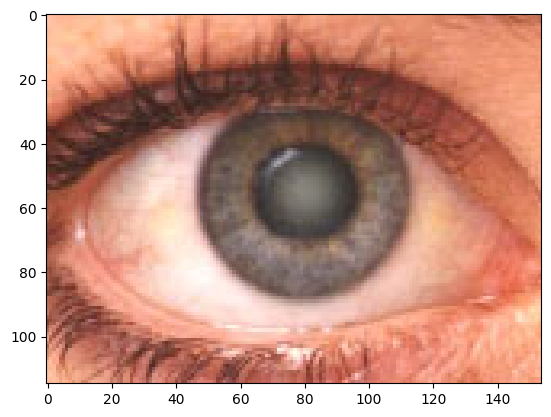

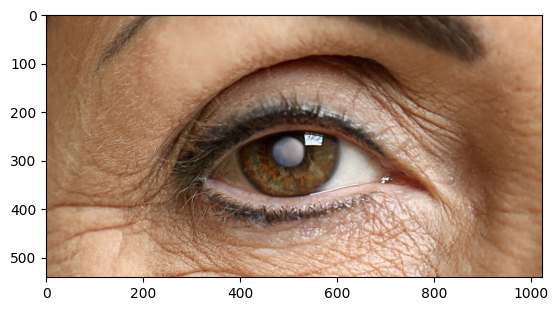

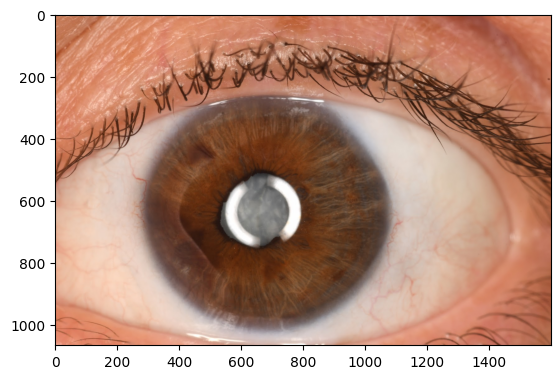

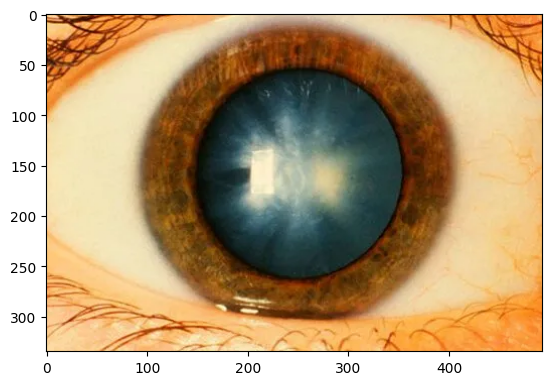

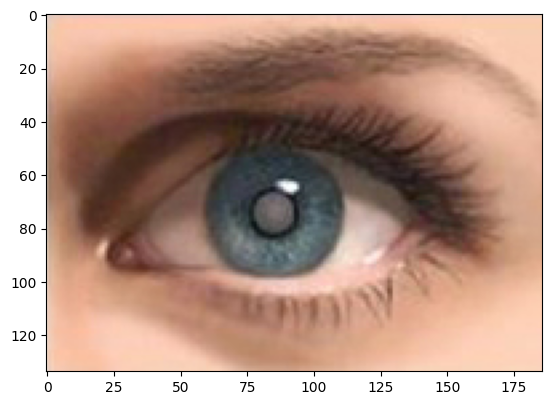

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Menampilkan 5 gambar pertama dalam folder train/cataract
image_files = os.listdir(train_cataract_path)[:5]

# Menampilkan gambar pertama
for image_file in image_files:
    img_path = os.path.join(train_cataract_path, image_file)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/cataract-image-dataset/processed_images/train/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/cataract-image-dataset/processed_images/test/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


**CNN**

In [ ]:
#224x224 piksel & rgb
input_shape = (224, 224, 3)

#menambahkan model satu persatu
model = Sequential()

# 32 kernel mempelajari 32 fitur dan filter 3x3, relu mempelajari pola yg lebih kompleks
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
# mengambil max 2x2 piksel dan mengurangi ukuran

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# 2d -> 1d
model.add(Flatten())

#128 neuron
model.add(Dense(128, activation='relu'))

#menghilangkan 50% neuron
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.4993 - loss: 1.3446 - val_accuracy: 0.8595 - val_loss: 0.5209
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7932 - loss: 0.5107 - val_accuracy: 0.7521 - val_loss: 0.4830
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8195 - loss: 0.4171 - val_accuracy: 0.5785 - val_loss: 0.7007
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7855 - loss: 0.4185 - val_accuracy: 0.8595 - val_loss: 0.3549
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8725 - loss: 0.2849 - val_accuracy: 0.9174 - val_loss: 0.3001
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9145 - loss: 0.2172 - val_accuracy: 0.9339 - val_loss: 0.3158
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9373 - loss: 0.1901 - val_accuracy: 0.9421 - val_loss: 0.3689
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9394 - loss: 0.1512 - val_accuracy: 0.9339 - val_loss:

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9053 - loss: 0.3677
Test Accuracy: 90.91%


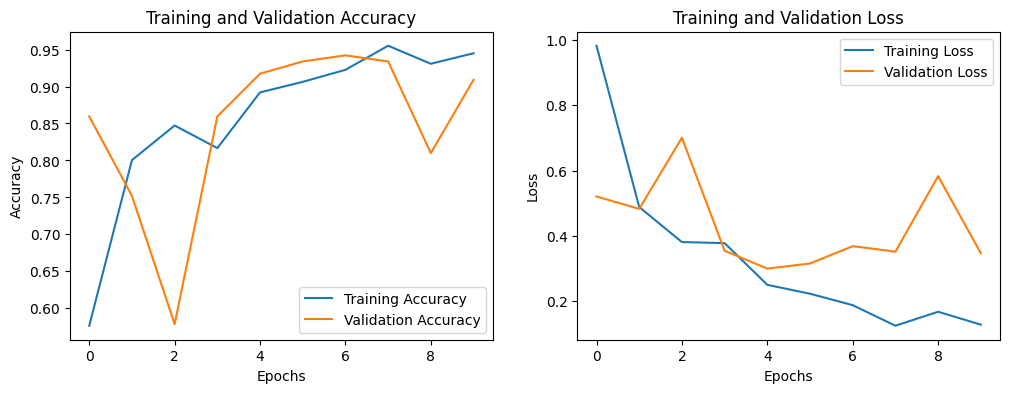

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 929ms/step - accuracy: 0.9095 - loss: 0.3851
Test Accuracy: 90.91%


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# save model
model.save('cataract_model_CNN.h5')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

**CNN (Tambah Layer) & 15 epoch**

In [ ]:
input_shape = (224, 224, 3)

model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 576,961 (2.20 MB)

 Trainable params: 576,961 (2.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9694 - loss: 0.1440 - val_accuracy: 0.9174 - val_loss: 0.2542
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9600 - loss: 0.1349 - val_accuracy: 0.9421 - val_loss: 0.3253
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9626 - loss: 0.1229 - val_accuracy: 0.9256 - val_loss: 0.3131
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9690 - loss: 0.0795 - val_accuracy: 0.9339 - val_loss: 0.3879
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9792 - loss: 0.0529 - val_accuracy: 0.9339 - val_loss: 0.3913
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9628 - loss: 0.1024 - val_accuracy: 0.9008 - val_loss: 0.6102
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9832 - loss: 0.0671 - val_accuracy: 0.9421 - val_loss: 0.5831
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9853 - loss: 0.0511 - val_accuracy: 0.9421 - val_loss:

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 796ms/step - accuracy: 0.9284 - loss: 0.3812
Test Accuracy: 91.74%


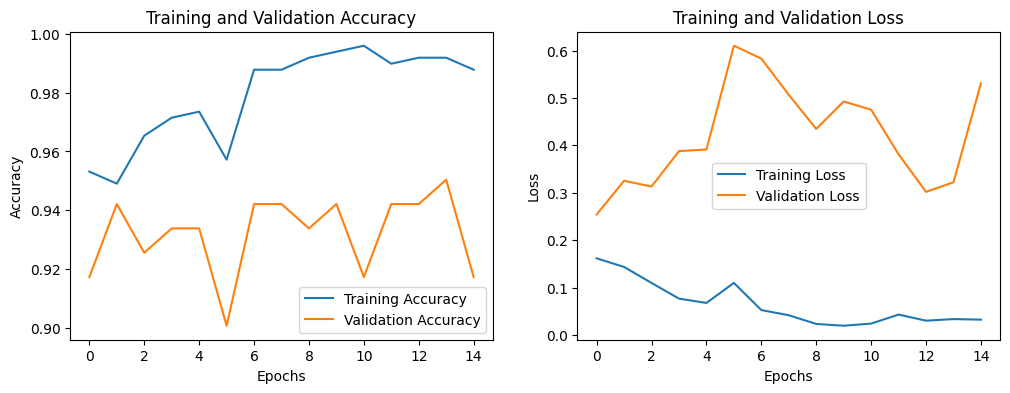

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 787ms/step - accuracy: 0.9305 - loss: 0.3619
Test Accuracy: 91.74%


In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

# save model
model.save('cataract_model_CNN.h5')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

**CNN TAMBAH LAYER & 10 epoch**

In [ ]:
input_shape = (224, 224, 3)

model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 576,961 (2.20 MB)

 Trainable params: 576,961 (2.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5099 - loss: 0.7005 - val_accuracy: 0.5537 - val_loss: 0.6702
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.6640 - loss: 0.6309 - val_accuracy: 0.5950 - val_loss: 0.5878
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7709 - loss: 0.5125 - val_accuracy: 0.8430 - val_loss: 0.4252
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8602 - loss: 0.3082 - val_accuracy: 0.8099 - val_loss: 0.4127
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8233 - loss: 0.3960 - val_accuracy: 0.8760 - val_loss: 0.3543
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9068 - loss: 0.2745 - val_accuracy: 0.8430 - val_loss: 0.3556
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9030 - loss: 0.2408 - val_accuracy: 0.9008 - val_loss: 0.3357
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9024 - loss: 0.2286 - val_accuracy: 0.9091 - val_loss:

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 901ms/step - accuracy: 0.8846 - loss: 0.3866
Test Accuracy: 86.78%


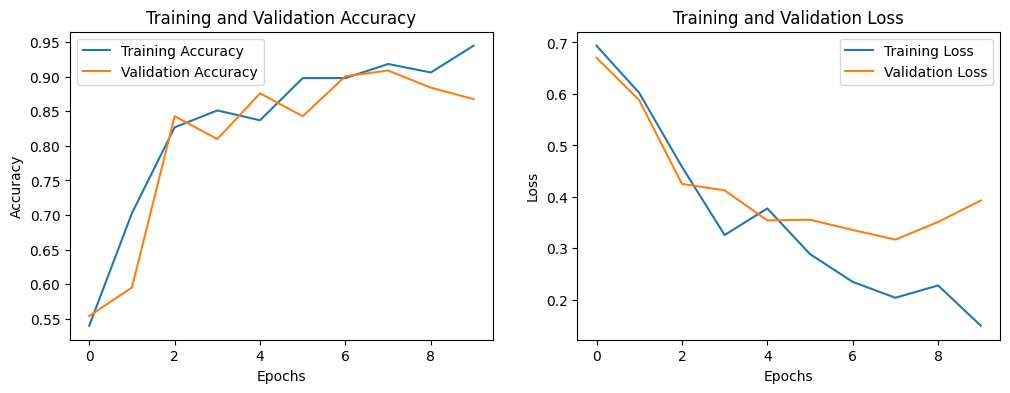

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8721 - loss: 0.4001
Test Accuracy: 86.78%


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# save model
model.save('cataract_model_CNN.h5')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

**MobileNetV2**

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.5040 - loss: 0.8977 - val_accuracy: 0.7521 - val_loss: 0.5214
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7063 - loss: 0.5408 - val_accuracy: 0.8678 - val_loss: 0.3594
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8057 - loss: 0.3982 - val_accuracy: 0.8926 - val_loss: 0.2787
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8675 - loss: 0.3183 - val_accuracy: 0.9174 - val_loss: 0.2344
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9124 - loss: 0.2634 - val_accuracy: 0.9256 - val_loss: 0.2054
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9280 - loss: 0.2168 - val_accuracy: 0.9256 - val_loss: 0.1899
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9160 - loss: 0.2249 - val_accuracy: 0.9256 - val_loss: 0.1745
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9233 - loss: 0.2013 - val_accuracy: 0.9256 - val_loss:

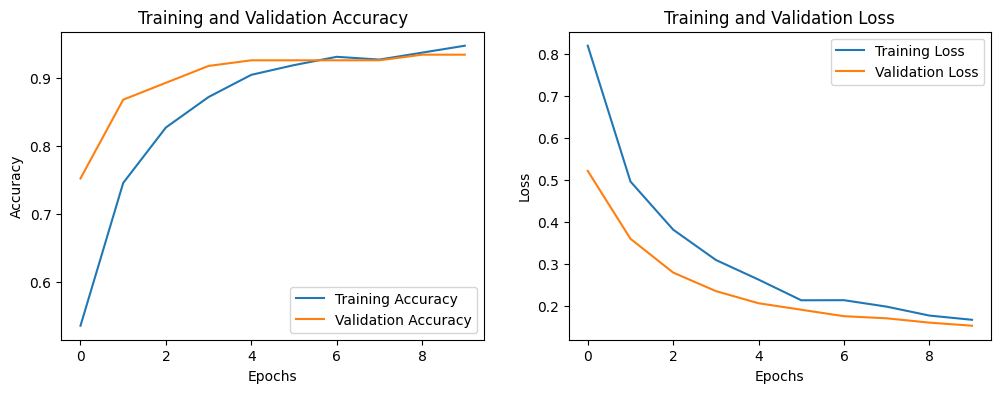

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9298 - loss: 0.1606
Test Accuracy: 93.39%


In [ ]:
# shape
input_shape = (224, 224, 3)

# buat model pre trained
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# bekukan semua layer
for layer in base_model.layers:
    layer.trainable = False

#membuat model dgn bbrp lapisan
#base
#ambil rata" fitur dari lapisan sblm

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


# optimizer
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# ringkasan model
model.summary()

#latih model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# save model
model.save('cataract_model.h5')

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

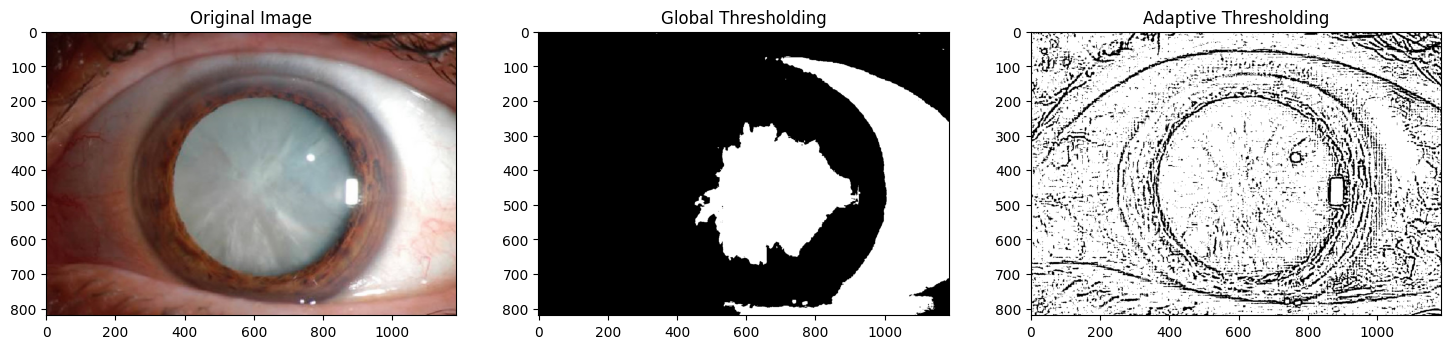

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = '/kaggle/input/cataract-image-dataset/processed_images/train/cataract/image_104.png'
image = cv2.imread(image_path)

thresh_ada = cv2.adaptiveThreshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

_, thresh = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 150, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Global Thresholding')

plt.subplot(1, 3, 3)
plt.imshow(thresh_ada, cmap='gray')
plt.title('Adaptive Thresholding')

plt.show()

**CEK HASIL**

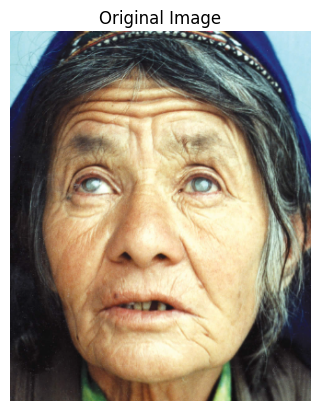

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediksi: Katarak


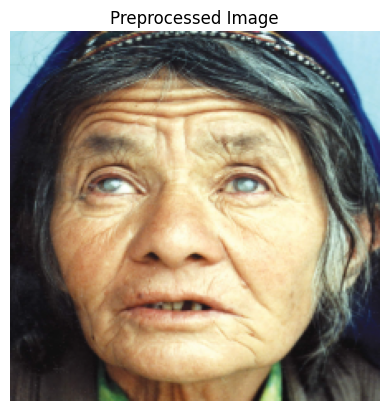

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


# Membaca gambar menggunakan OpenCV
img = cv2.imread("/content/full.png")

# Ubah gambar ke RGB untuk menampilkan dengan Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Menampilkan gambar asli
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Preprocessing Gambar (ubah ukuran dan normalisasi)
img_resized = cv2.resize(img, (224, 224))  # Ubah ukuran gambar sesuai dengan input model
img_normalized = img_resized / 255.0  # Normalisasi piksel gambar

# Menambahkan dimensi batch
img_batch = np.expand_dims(img_normalized, axis=0)

# Memuat model yang sudah dilatih (misalnya MobileNetV2 atau model lainnya)
model = load_model('/content/cataract_model.h5')

# Melakukan prediksi
prediction = model.predict(img_batch)

# Menampilkan hasil prediksi
if prediction[0] > 0.5:
    print("Prediksi: Katarak")
else:
    print("Prediksi: Normal")

#  Menampilkan gambar setelah preprocessing
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()


In [ ]:
import tensorflow as tf

# Load model
model = tf.keras.models.load_model('cataract_model.h5')

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save
with open('Katarak_model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmp14tv4kge'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134744403467088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134744403469968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134744403468240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134744403469008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134744403466128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134744403470928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134744403471312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134744403471696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134744403471504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134744403468816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1347444034728